<h1>Name -  Sanil Rodrigues, Vignesh Sivakumar </h1>
<h1>IE 5734: Foundations of Data Analytics </h1>
Question:

The link provides the twitter data of Elon Musk from 2010-2022. For analysis consider
the years 2017-2022. Each year has thousands of tweets. Assume each year to be a
document (all the tweets in one year will be considered as a document).
1. Compute word frequencies for each year. Exclude the stop words
2. Show top 10 words (for each year) by the highest value of word frequency
3. Plot histogram of word frequencies for each year
4. Use Zipf’s law and plot log-log plots of word frequencies and rank for each year
5. Create bigram network graphs for each year



---

Solution:

I have mentiond year as heading and Every year has 7 Cells which contains solution. I Have perfomed Analysis on the data from 2011-2022.

Cell wise Explaination

1. Reading the Dataset, Cleaning the unwanted values and Cubbing everything in one string.

2. Spliting each and every word.

3. Making Dataframe of words and frquency of word.

4. Top 10 words and frequency.

5. Ploting Histogram of Top 10 words vs frquency.

6. ploting log-log plots of word frequencies and rank.

7. Creating bigram network

Refrences:- 

1. https://en.wikipedia.org/wiki/Zipf%27s_law

In [ ]:
import pandas as pd
import numpy as np
import os
import nltk
import re
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
from textblob import TextBlob
import networkx as nx
G = nx.Graph()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd  '/content/drive/MyDrive/Data' 

/content/drive/MyDrive/Data


##For 2011

In [ ]:
df = pd.read_csv('2011.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

ever wanted know real truth abowalked around neighborhood recently rebuilt wit xmas brought presents kidmet unicef doctors without borders arjust returned trip haiti covered lsingle character tweets ulitmate extens ithe russians having some challenges thwe long interesting conversation mkanye stopped spacex rocket factory todamodel options out performance red andhi im art garfunkel heard soundraul campos invited do guest dj gig yum even better deep fried butter yeah really mom mayemusk wigot called randomly kanye west today rechis singing acting talent sorely miwhy does crowd cry over glorious leadersam harris also wrote nice piece awesoread lying new book friend sam haram reading great biography ben franklin total non sequitur btwgreat voltaire quote arguably better twaii made volume model went iceland sat ride bumper cars iplease ignore prior tweets someone


In [ ]:
a = text.split()
print(a)

['ever', 'wanted', 'know', 'real', 'truth', 'abowalked', 'around', 'neighborhood', 'recently', 'rebuilt', 'wit', 'xmas', 'brought', 'presents', 'kidmet', 'unicef', 'doctors', 'without', 'borders', 'arjust', 'returned', 'trip', 'haiti', 'covered', 'lsingle', 'character', 'tweets', 'ulitmate', 'extens', 'ithe', 'russians', 'having', 'some', 'challenges', 'thwe', 'long', 'interesting', 'conversation', 'mkanye', 'stopped', 'spacex', 'rocket', 'factory', 'todamodel', 'options', 'out', 'performance', 'red', 'andhi', 'im', 'art', 'garfunkel', 'heard', 'soundraul', 'campos', 'invited', 'do', 'guest', 'dj', 'gig', 'yum', 'even', 'better', 'deep', 'fried', 'butter', 'yeah', 'really', 'mom', 'mayemusk', 'wigot', 'called', 'randomly', 'kanye', 'west', 'today', 'rechis', 'singing', 'acting', 'talent', 'sorely', 'miwhy', 'does', 'crowd', 'cry', 'over', 'glorious', 'leadersam', 'harris', 'also', 'wrote', 'nice', 'piece', 'awesoread', 'lying', 'new', 'book', 'friend', 'sam', 'haram', 'reading', 'great

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0          better          2
1          tweets          2
2            ever          1
3          sorely          1
4           piece          1
..            ...        ...
121  conversation          1
122   interesting          1
123          long          1
124          thwe          1
125       someone          1

[126 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0     better          2
1     tweets          2
2       ever          1
3     sorely          1
4      piece          1
5       nice          1
6      wrote          1
7       also          1
8     harris          1
9  leadersam          1

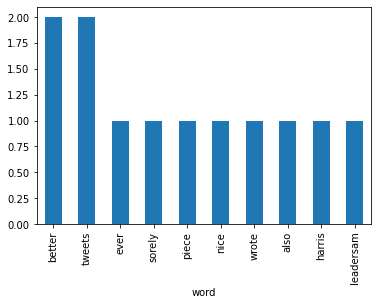

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

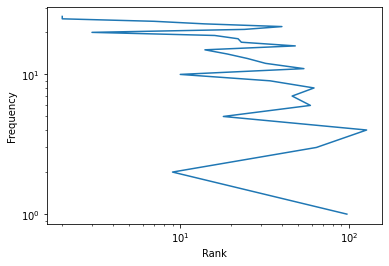

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['ever', 'wanted']), WordList(['wanted', 'know']), WordList(['know', 'real']), WordList(['real', 'truth']), WordList(['truth', 'abowalked']), WordList(['abowalked', 'around']), WordList(['around', 'neighborhood']), WordList(['neighborhood', 'recently']), WordList(['recently', 'rebuilt']), WordList(['rebuilt', 'wit']), WordList(['wit', 'xmas']), WordList(['xmas', 'brought']), WordList(['brought', 'presents']), WordList(['presents', 'kidmet']), WordList(['kidmet', 'unicef']), WordList(['unicef', 'doctors']), WordList(['doctors', 'without']), WordList(['without', 'borders']), WordList(['borders', 'arjust']), WordList(['arjust', 'returned']), WordList(['returned', 'trip']), WordList(['trip', 'haiti']), WordList(['haiti', 'covered']), WordList(['covered', 'lsingle']), WordList(['lsingle', 'character']), WordList(['character', 'tweets']), WordList(['tweets', 'ulitmate']), WordList(['ulitmate', 'extens']), WordList(['extens', 'ithe']), WordList(['ithe', 'russians']), WordList(['russ

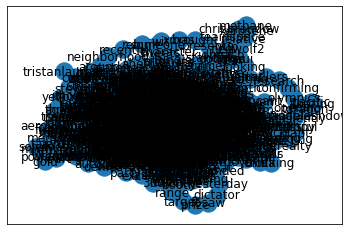

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2012

In [ ]:
df = pd.read_csv('2012.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

tristanlaurent cute merry xmascowboy riding rocket problemo single camera view 40 meter rocket hoverthen took ride 40 meter hover flito provide little perspective size very much agree great review chasithanks ev driven tesla model 50 mia beautiful aweinspiring view earth frogood piece volcanoes danretz usgs wouprbowman roughly equivalent 747 flight frimprobabletoad thats im believer soexactly mt danretz imho continuing unconit hard argue thermometer global cool video recap big events year neowolf2 relative kerosene methane chrisbrandow teainspace yup douglas aircmy big worry would long hopefully term whespacex go public some point thinkintlmanofrealty best study some form engtesla articles 30 mins apart stock sctesla just approved full class 1 masstold kids age 8 6 were going tcongrats dmetcalf being first drinteresting possible answer fermi paradoam happy report tesla narrowly cashuranium ore now available amazon much mo shervin thanks shervincant put finger some reason humanity wishe

In [ ]:
a = text.split()
print(a)

['tristanlaurent', 'cute', 'merry', 'xmascowboy', 'riding', 'rocket', 'problemo', 'single', 'camera', 'view', '40', 'meter', 'rocket', 'hoverthen', 'took', 'ride', '40', 'meter', 'hover', 'flito', 'provide', 'little', 'perspective', 'size', 'very', 'much', 'agree', 'great', 'review', 'chasithanks', 'ev', 'driven', 'tesla', 'model', '50', 'mia', 'beautiful', 'aweinspiring', 'view', 'earth', 'frogood', 'piece', 'volcanoes', 'danretz', 'usgs', 'wouprbowman', 'roughly', 'equivalent', '747', 'flight', 'frimprobabletoad', 'thats', 'im', 'believer', 'soexactly', 'mt', 'danretz', 'imho', 'continuing', 'unconit', 'hard', 'argue', 'thermometer', 'global', 'cool', 'video', 'recap', 'big', 'events', 'year', 'neowolf2', 'relative', 'kerosene', 'methane', 'chrisbrandow', 'teainspace', 'yup', 'douglas', 'aircmy', 'big', 'worry', 'would', 'long', 'hopefully', 'term', 'whespacex', 'go', 'public', 'some', 'point', 'thinkintlmanofrealty', 'best', 'study', 'some', 'form', 'engtesla', 'articles', '30', 'mi

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0        model         19
1         just         19
2       rocket         17
3        tesla         15
4       dragon         10
...        ...        ...
1159   volcano          1
1160   caldera          1
1161     since          1
1162  didn23mc          1
1163   someone          1

[1164 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0   model         19
1    just         19
2  rocket         17
3   tesla         15
4  dragon         10
5   space          9
6     all          8
7  spacex          8
8   first          7
9    some          6

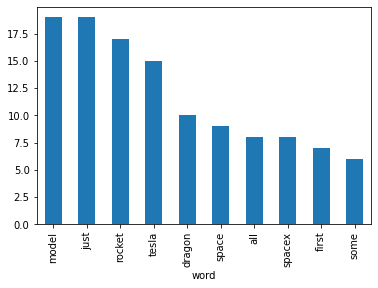

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

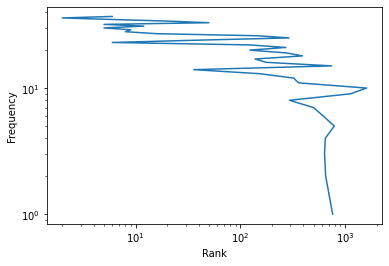

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['tristanlaurent', 'cute']), WordList(['cute', 'merry']), WordList(['merry', 'xmascowboy']), WordList(['xmascowboy', 'riding']), WordList(['riding', 'rocket']), WordList(['rocket', 'problemo']), WordList(['problemo', 'single']), WordList(['single', 'camera']), WordList(['camera', 'view']), WordList(['view', '40']), WordList(['40', 'meter']), WordList(['meter', 'rocket']), WordList(['rocket', 'hoverthen']), WordList(['hoverthen', 'took']), WordList(['took', 'ride']), WordList(['ride', '40']), WordList(['40', 'meter']), WordList(['meter', 'hover']), WordList(['hover', 'flito']), WordList(['flito', 'provide']), WordList(['provide', 'little']), WordList(['little', 'perspective']), WordList(['perspective', 'size']), WordList(['size', 'very']), WordList(['very', 'much']), WordList(['much', 'agree']), WordList(['agree', 'great']), WordList(['great', 'review']), WordList(['review', 'chasithanks']), WordList(['chasithanks', 'ev']), WordList(['ev', 'driven']), WordList(['driven', 'tesl

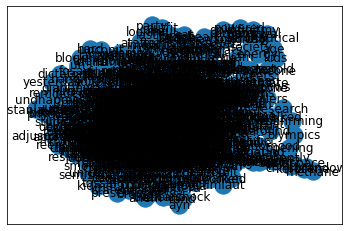

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2013

In [ ]:
df = pd.read_csv('2013.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','am','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

bonnienorman teslamotors teslamotorsclub mersimonhackett definitely needs huge amouthis think solar power pri arcaresenal true220 ft tall mobile crane carry rocket arsolarcity launches give power foundation sock monkey destruction rest peace nelson mandela man both good should mention battery cells used solar power batteries primary noview earth upper stage rear view camerarestart good apogee raised 80k km 50k reached parking orbit now coasting towards equlive video feed launch hour away launch id like tha toruonu cool ufrugger10 agree restored shortlytierrauniversu fixed weekend htierrauniversu writer article tierrauniversu doesnt sound right german govt reviews tesla model fires duall known rocket anomalies resolved spendthe gas generator small rocket engine thatengines cycling cleanly ground pneumaticsabort caused oxygen ground side teatrocket engines healthy cleaning turbopwilliamshatner probably least fewe called manual abort better paranoid aif launch aborts bring rocket downincr

In [ ]:
a = text.split()
print(a)

['bonnienorman', 'teslamotors', 'teslamotorsclub', 'mersimonhackett', 'definitely', 'needs', 'huge', 'amouthis', 'think', 'solar', 'power', 'pri', 'arcaresenal', 'true220', 'ft', 'tall', 'mobile', 'crane', 'carry', 'rocket', 'arsolarcity', 'launches', 'give', 'power', 'foundation', 'sock', 'monkey', 'destruction', 'rest', 'peace', 'nelson', 'mandela', 'man', 'both', 'good', 'should', 'mention', 'battery', 'cells', 'used', 'solar', 'power', 'batteries', 'primary', 'noview', 'earth', 'upper', 'stage', 'rear', 'view', 'camerarestart', 'good', 'apogee', 'raised', '80k', 'km', '50k', 'reached', 'parking', 'orbit', 'now', 'coasting', 'towards', 'equlive', 'video', 'feed', 'launch', 'hour', 'away', 'launch', 'id', 'like', 'tha', 'toruonu', 'cool', 'ufrugger10', 'agree', 'restored', 'shortlytierrauniversu', 'fixed', 'weekend', 'htierrauniversu', 'writer', 'article', 'tierrauniversu', 'doesnt', 'sound', 'right', 'german', 'govt', 'reviews', 'tesla', 'model', 'fires', 'duall', 'known', 'rocket',

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0                   tesla         56
1                   model         39
2                  rocket         39
3                    good         18
4                  dragon         16
...                   ...        ...
2257              transit          1
2258       ignitiotcmeggs          1
2259             reusable          1
2260  richardbransonfirst          1
2261              someone          1

[2262 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0   tesla         56
1   model         39
2  rocket         39
3    good         18
4  dragon         16
5  spacex         16
6  thanks         15
7    cool         14
8  launch         14
9    more         12

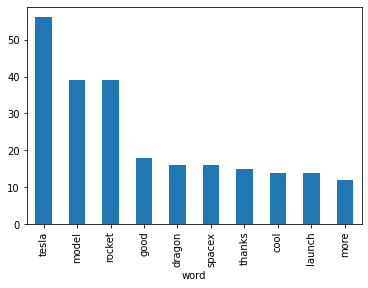

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

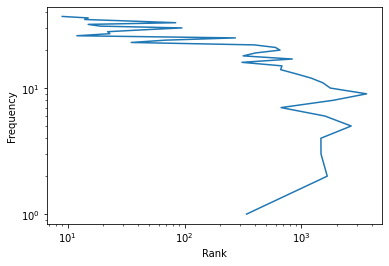

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['bonnienorman', 'teslamotors']), WordList(['teslamotors', 'teslamotorsclub']), WordList(['teslamotorsclub', 'mersimonhackett']), WordList(['mersimonhackett', 'definitely']), WordList(['definitely', 'needs']), WordList(['needs', 'huge']), WordList(['huge', 'amouthis']), WordList(['amouthis', 'think']), WordList(['think', 'solar']), WordList(['solar', 'power']), WordList(['power', 'pri']), WordList(['pri', 'arcaresenal']), WordList(['arcaresenal', 'true220']), WordList(['true220', 'ft']), WordList(['ft', 'tall']), WordList(['tall', 'mobile']), WordList(['mobile', 'crane']), WordList(['crane', 'carry']), WordList(['carry', 'rocket']), WordList(['rocket', 'arsolarcity']), WordList(['arsolarcity', 'launches']), WordList(['launches', 'give']), WordList(['give', 'power']), WordList(['power', 'foundation']), WordList(['foundation', 'sock']), WordList(['sock', 'monkey']), WordList(['monkey', 'destruction']), WordList(['destruction', 'rest']), WordList(['rest', 'peace']), WordList(['p

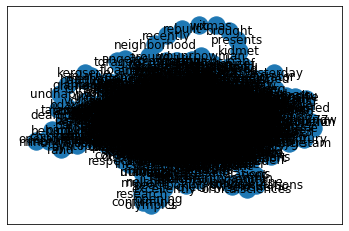

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2014

In [ ]:
df = pd.read_csv('2014.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','9','am','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

reading culture series banks compellingroadster upgrade enable nonstop travel frnothing against oatmealraisin cookies really should rule oatmealraisin cooid recommend competing 10m learning xtesla fast battery swap details pack swap now operating limited beta mode fofalcondragon launch punted early jan need dune series herbert also brilliant advoc reread asimovs foundation series brilliantwelcome back ricardor run teslamotors idaacarmack works dragon hard flight grid fins look like ones thisidaacarmack choice entry velocity too hijohngardi using legs air brakes drop tegrid fins stowed ascent then deploy base 300 ft 100 ft wings extentesting operation hypersonic grid fins xwicuteness overload mt wired baby baboon snuabout nevada deal tesla really hate when companies bring out awesrumors canceling falcon wing doors fa tesla comic book shmizer1 unfettered certainly very low spacex still early stages developiastronauts play blobs water zero grareview performance version dual motor moddeepe

In [ ]:
a = text.split()
print(a)

['reading', 'culture', 'series', 'banks', 'compellingroadster', 'upgrade', 'enable', 'nonstop', 'travel', 'frnothing', 'against', 'oatmealraisin', 'cookies', 'really', 'should', 'rule', 'oatmealraisin', 'cooid', 'recommend', 'competing', '10m', 'learning', 'xtesla', 'fast', 'battery', 'swap', 'details', 'pack', 'swap', 'now', 'operating', 'limited', 'beta', 'mode', 'fofalcondragon', 'launch', 'punted', 'early', 'jan', 'need', 'dune', 'series', 'herbert', 'also', 'brilliant', 'advoc', 'reread', 'asimovs', 'foundation', 'series', 'brilliantwelcome', 'back', 'ricardor', 'run', 'teslamotors', 'idaacarmack', 'works', 'dragon', 'hard', 'flight', 'grid', 'fins', 'look', 'like', 'ones', 'thisidaacarmack', 'choice', 'entry', 'velocity', 'too', 'hijohngardi', 'using', 'legs', 'air', 'brakes', 'drop', 'tegrid', 'fins', 'stowed', 'ascent', 'then', 'deploy', 'base', '300', 'ft', '100', 'ft', 'wings', 'extentesting', 'operation', 'hypersonic', 'grid', 'fins', 'xwicuteness', 'overload', 'mt', 'wired'

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0              tesla         68
1              model         48
2             rocket         46
3             falcon         24
4               good         23
...              ...        ...
2688  vrobertgaristo          1
2689    andreasjames          1
2690        features          1
2691     unbloomberg          1
2692         someone          1

[2693 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0   tesla         68
1   model         48
2  rocket         46
3  falcon         24
4    good         23
5  dragon         23
6  launch         21
7     now         18
8  spacex         18
9  thanks         17

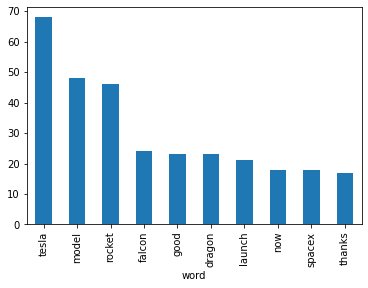

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

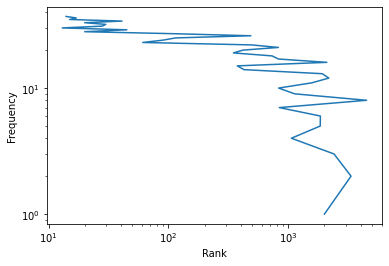

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['reading', 'culture']), WordList(['culture', 'series']), WordList(['series', 'banks']), WordList(['banks', 'compellingroadster']), WordList(['compellingroadster', 'upgrade']), WordList(['upgrade', 'enable']), WordList(['enable', 'nonstop']), WordList(['nonstop', 'travel']), WordList(['travel', 'frnothing']), WordList(['frnothing', 'against']), WordList(['against', 'oatmealraisin']), WordList(['oatmealraisin', 'cookies']), WordList(['cookies', 'really']), WordList(['really', 'should']), WordList(['should', 'rule']), WordList(['rule', 'oatmealraisin']), WordList(['oatmealraisin', 'cooid']), WordList(['cooid', 'recommend']), WordList(['recommend', 'competing']), WordList(['competing', '10m']), WordList(['10m', 'learning']), WordList(['learning', 'xtesla']), WordList(['xtesla', 'fast']), WordList(['fast', 'battery']), WordList(['battery', 'swap']), WordList(['swap', 'details']), WordList(['details', 'pack']), WordList(['pack', 'swap']), WordList(['swap', 'now']), WordList(['now'

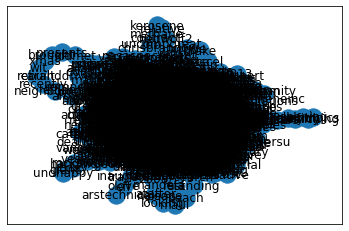

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2015

In [ ]:
df = pd.read_csv('2015.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','9','am','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

live video lz1 falcon standing lz1 cape canaveral ht morganpage thanks there back again jonfavreau thanks jon11 satellites deployed target orbit falc background launch launch landing seen reviewed mission params spacex team moncurrently looking good sunday night 8pmmeant reply article article does appreciate tesla static fire test looks good pending data revierounding up 1 sec bit timing marginaborted ignition timing due slow ground 2 mins static fire elonmusk holding issue resolutionabort triggered flight computer upper sta 5 mins static fire test lukealization 70f 20 craigcocca worked texaspaigeanjax 340 case deep cryo incrfalcon vertical launch pad cape mashabletech mashable really letter nvance article selfdriving cars inaccuraannouncing formation openai aiming falcon rocket static fire cape ca laulauritzen agreed working wow nasa best luck cygnus launchmikebloomberg nice ride looking forward segood summary talk paris climate chaabout give talk sorbonne idaacarmack yep good points 

In [ ]:
a = text.split()
print(a)

['live', 'video', 'lz1', 'falcon', 'standing', 'lz1', 'cape', 'canaveral', 'ht', 'morganpage', 'thanks', 'there', 'back', 'again', 'jonfavreau', 'thanks', 'jon11', 'satellites', 'deployed', 'target', 'orbit', 'falc', 'background', 'launch', 'launch', 'landing', 'seen', 'reviewed', 'mission', 'params', 'spacex', 'team', 'moncurrently', 'looking', 'good', 'sunday', 'night', '8pmmeant', 'reply', 'article', 'article', 'does', 'appreciate', 'tesla', 'static', 'fire', 'test', 'looks', 'good', 'pending', 'data', 'revierounding', 'up', '1', 'sec', 'bit', 'timing', 'marginaborted', 'ignition', 'timing', 'due', 'slow', 'ground', '2', 'mins', 'static', 'fire', 'elonmusk', 'holding', 'issue', 'resolutionabort', 'triggered', 'flight', 'computer', 'upper', 'sta', '5', 'mins', 'static', 'fire', 'test', 'lukealization', '70f', '20', 'craigcocca', 'worked', 'texaspaigeanjax', '340', 'case', 'deep', 'cryo', 'incrfalcon', 'vertical', 'launch', 'pad', 'cape', 'mashabletech', 'mashable', 'really', 'letter'

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0               tesla         81
1              rocket         58
2               model         58
3                good         37
4              falcon         32
...               ...        ...
3336          entrust          1
3337        telonmusk          1
3338  selfservleasing          1
3339       signatesla          1
3340           ignore          1

[3341 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0   tesla         81
1  rocket         58
2   model         58
3    good         37
4  falcon         32
5  dragon         29
6  launch         29
7  spacex         27
8  thanks         27
9     now         21

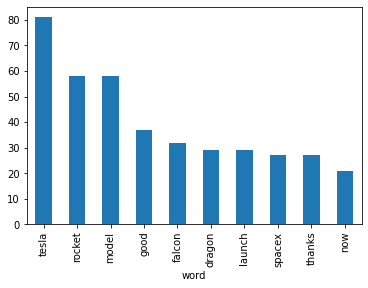

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

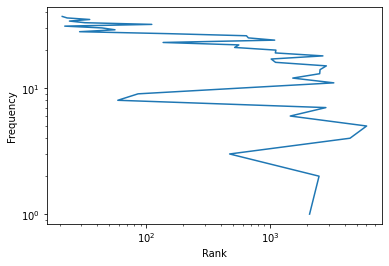

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['live', 'video']), WordList(['video', 'lz1']), WordList(['lz1', 'falcon']), WordList(['falcon', 'standing']), WordList(['standing', 'lz1']), WordList(['lz1', 'cape']), WordList(['cape', 'canaveral']), WordList(['canaveral', 'ht']), WordList(['ht', 'morganpage']), WordList(['morganpage', 'thanks']), WordList(['thanks', 'there']), WordList(['there', 'back']), WordList(['back', 'again']), WordList(['again', 'jonfavreau']), WordList(['jonfavreau', 'thanks']), WordList(['thanks', 'jon11']), WordList(['jon11', 'satellites']), WordList(['satellites', 'deployed']), WordList(['deployed', 'target']), WordList(['target', 'orbit']), WordList(['orbit', 'falc']), WordList(['falc', 'background']), WordList(['background', 'launch']), WordList(['launch', 'launch']), WordList(['launch', 'landing']), WordList(['landing', 'seen']), WordList(['seen', 'reviewed']), WordList(['reviewed', 'mission']), WordList(['mission', 'params']), WordList(['params', 'spacex']), WordList(['spacex', 'team']), Wor

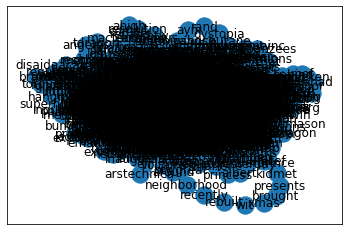

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2016

In [ ]:
df = pd.read_csv('2016.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','9','am','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

quipme occasional existential dread inevitadjsearle fredericlambert grid wont nfredericlambert mere 350 kw youyamenalhaddad brain full right now thatfredericlambert there some installed alreaddaogaru dont like p100dl wpconner good idea mwangltg yessweenschris should complete 2017 one dedarkdude203 keyed off volume musicmaggiore50 typing mars after holding down themake sure car connected wifi theto activate model holiday performance ju cjdsb looking promising next weekpcwizardllc major precipitating event jelleprins some years away yespcwizardllc restored soon there thebeazles night easy twilight hardestvicentes actually rolling out vicentes yessamlawrence 81 which hopefully goes out nextdragtimes hoping next week also going thrlooks like might ready rollout most oftesla receives highest owner satisfaction scoretesla autopilot vision neural net now working slackmds workadrianvolts teslamotors teslamotorsclub tes chromejs10 should start changing soon actually going thisteslamotors going 

In [ ]:
a = text.split()
print(a)

['quipme', 'occasional', 'existential', 'dread', 'inevitadjsearle', 'fredericlambert', 'grid', 'wont', 'nfredericlambert', 'mere', '350', 'kw', 'youyamenalhaddad', 'brain', 'full', 'right', 'now', 'thatfredericlambert', 'there', 'some', 'installed', 'alreaddaogaru', 'dont', 'like', 'p100dl', 'wpconner', 'good', 'idea', 'mwangltg', 'yessweenschris', 'should', 'complete', '2017', 'one', 'dedarkdude203', 'keyed', 'off', 'volume', 'musicmaggiore50', 'typing', 'mars', 'after', 'holding', 'down', 'themake', 'sure', 'car', 'connected', 'wifi', 'theto', 'activate', 'model', 'holiday', 'performance', 'ju', 'cjdsb', 'looking', 'promising', 'next', 'weekpcwizardllc', 'major', 'precipitating', 'event', 'jelleprins', 'some', 'years', 'away', 'yespcwizardllc', 'restored', 'soon', 'there', 'thebeazles', 'night', 'easy', 'twilight', 'hardestvicentes', 'actually', 'rolling', 'out', 'vicentes', 'yessamlawrence', '81', 'which', 'hopefully', 'goes', 'out', 'nextdragtimes', 'hoping', 'next', 'week', 'also'

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0               tesla        114
1               model         81
2              rocket         68
3                good         53
4              thanks         44
...               ...        ...
4667        triggered          1
4668              70f          1
4669       craigcocca          1
4670  texaspaigeanjax          1
4671           ignore          1

[4672 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0        tesla        114
1        model         81
2       rocket         68
3         good         53
4       thanks         44
5       spacex         42
6         like         42
7       launch         39
8       falcon         37
9  teslamotors         35

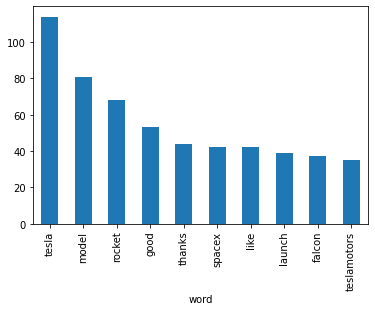

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

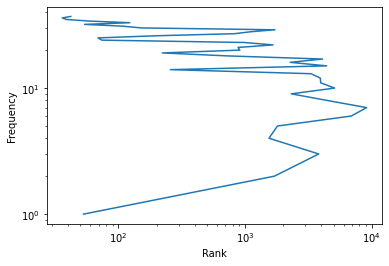

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['quipme', 'occasional']), WordList(['occasional', 'existential']), WordList(['existential', 'dread']), WordList(['dread', 'inevitadjsearle']), WordList(['inevitadjsearle', 'fredericlambert']), WordList(['fredericlambert', 'grid']), WordList(['grid', 'wont']), WordList(['wont', 'nfredericlambert']), WordList(['nfredericlambert', 'mere']), WordList(['mere', '350']), WordList(['350', 'kw']), WordList(['kw', 'youyamenalhaddad']), WordList(['youyamenalhaddad', 'brain']), WordList(['brain', 'full']), WordList(['full', 'right']), WordList(['right', 'now']), WordList(['now', 'thatfredericlambert']), WordList(['thatfredericlambert', 'there']), WordList(['there', 'some']), WordList(['some', 'installed']), WordList(['installed', 'alreaddaogaru']), WordList(['alreaddaogaru', 'dont']), WordList(['dont', 'like']), WordList(['like', 'p100dl']), WordList(['p100dl', 'wpconner']), WordList(['wpconner', 'good']), WordList(['good', 'idea']), WordList(['idea', 'mwangltg']), WordList(['mwangltg',

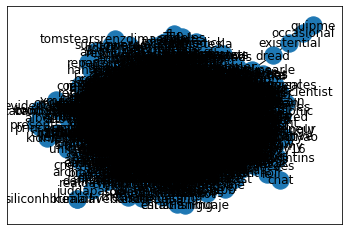

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2017

In [ ]:
df = pd.read_csv('2017.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','9','am','3','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

kreative vastly better mapsnav coming soon ddhogan ok jason tesla surekabirakhtar yeah terrible upgradsustainableanna vanseedbank similar total siziamsamcrompton sustainable energy production wmcflashtube gonna say well madsveiby should next update moskov donevanseedbank promise make pickseanmahoneyap sorry delay thewanted again send note deep gratitude tnicmedia123 least whatever lef alhenry1231 circle complete stevenmckie ok hats sold out flamethrowers soonultralightbeam does often seem mos mrcsscco trueso strange people often believe things inv kwebbelkop yeshaving sinking feeling most people actuawhen get new tesla software update go 46k limited edition boring hats sold 4k goi think last night might been biggest planet4589 cristatolive spacex isnt obviif liked tonights launch really neerajka never heard nuclear alien ufo north korea cristatolive spacex definitely aliens launch underway goodaudz mtlbagelboy paulkrugman phd redletterdave how much love twitterrbrome paulkrugman bloody

In [ ]:
a = text.split()
print(a)

['kreative', 'vastly', 'better', 'mapsnav', 'coming', 'soon', 'ddhogan', 'ok', 'jason', 'tesla', 'surekabirakhtar', 'yeah', 'terrible', 'upgradsustainableanna', 'vanseedbank', 'similar', 'total', 'siziamsamcrompton', 'sustainable', 'energy', 'production', 'wmcflashtube', 'gonna', 'say', 'well', 'madsveiby', 'should', 'next', 'update', 'moskov', 'donevanseedbank', 'promise', 'make', 'pickseanmahoneyap', 'sorry', 'delay', 'thewanted', 'again', 'send', 'note', 'deep', 'gratitude', 'tnicmedia123', 'least', 'whatever', 'lef', 'alhenry1231', 'circle', 'complete', 'stevenmckie', 'ok', 'hats', 'sold', 'out', 'flamethrowers', 'soonultralightbeam', 'does', 'often', 'seem', 'mos', 'mrcsscco', 'trueso', 'strange', 'people', 'often', 'believe', 'things', 'inv', 'kwebbelkop', 'yeshaving', 'sinking', 'feeling', 'most', 'people', 'actuawhen', 'get', 'new', 'tesla', 'software', 'update', 'go', '46k', 'limited', 'edition', 'boring', 'hats', 'sold', '4k', 'goi', 'think', 'last', 'night', 'might', 'been',

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0               tesla        153
1               model        117
2                good         79
3              rocket         78
4              spacex         75
...               ...        ...
6490           modify          1
6491  thisteslamotors          1
6492       chromejs10          1
6493              tes          1
6494           ignore          1

[6495 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0   tesla        153
1   model        117
2    good         79
3  rocket         78
4  spacex         75
5    like         62
6  thanks         56
7    yeah         54
8  launch         53
9  should         51

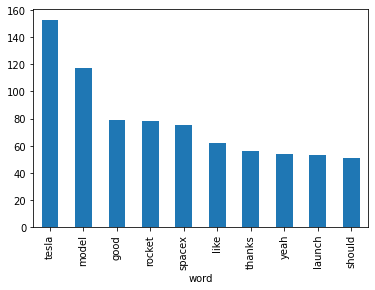

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

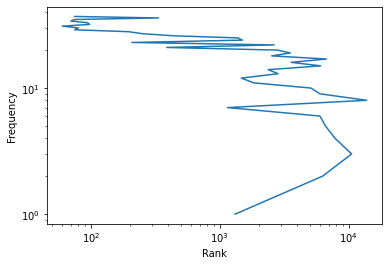

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['kreative', 'vastly']), WordList(['vastly', 'better']), WordList(['better', 'mapsnav']), WordList(['mapsnav', 'coming']), WordList(['coming', 'soon']), WordList(['soon', 'ddhogan']), WordList(['ddhogan', 'ok']), WordList(['ok', 'jason']), WordList(['jason', 'tesla']), WordList(['tesla', 'surekabirakhtar']), WordList(['surekabirakhtar', 'yeah']), WordList(['yeah', 'terrible']), WordList(['terrible', 'upgradsustainableanna']), WordList(['upgradsustainableanna', 'vanseedbank']), WordList(['vanseedbank', 'similar']), WordList(['similar', 'total']), WordList(['total', 'siziamsamcrompton']), WordList(['siziamsamcrompton', 'sustainable']), WordList(['sustainable', 'energy']), WordList(['energy', 'production']), WordList(['production', 'wmcflashtube']), WordList(['wmcflashtube', 'gon']), WordList(['gon', 'na']), WordList(['na', 'say']), WordList(['say', 'well']), WordList(['well', 'madsveiby']), WordList(['madsveiby', 'should']), WordList(['should', 'next']), WordList(['next', 'upda

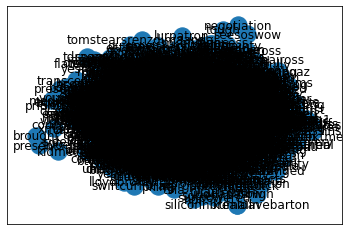

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2018

In [ ]:
df = pd.read_csv('2018.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','9','am','3','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

grimezsz turns out take dayquil exexcited larry ellison kathleen wi nutmegthered tesla ok westcoastbill tesla team did great job teslaownerssv alexraikos 2020 alexraikos yesseanabragg ecoheliguy 13ericralph31 ncbirbhecoheliguy 13ericralph31 ncbirbhan awakened13ericralph31 ncbirbhan awakenedparadi1 demkristennetten 13ericralph31 awakenedparadi1 13ericralph31 awakenedparadi1 demishassabis awakenedparadi1 demishassabis 30 demishassabis congratulations ckgaparajita coming soon whatsinside 5allanlevito got motorsep definitely major highways tex jimjimroger yep dodo723 yesyes supercharger coverage extend 100 most people dont know tesla supercharmartinmeany dramatically increasing tes magoo5042 tesla ok jpcautillo wowjtrichards mmelinot chuckyyyd incormost importantly every electric car tesla because electricity costs much less gthere also many state local incentivereminder us buyers 7500 tax creditmerry christmas goodwill andrewsamoylich erdayastronaut 13ericralph31lexfridman tesla karpathy 

In [ ]:
a = text.split()
print(a)

['grimezsz', 'turns', 'out', 'take', 'dayquil', 'exexcited', 'larry', 'ellison', 'kathleen', 'wi', 'nutmegthered', 'tesla', 'ok', 'westcoastbill', 'tesla', 'team', 'did', 'great', 'job', 'teslaownerssv', 'alexraikos', '2020', 'alexraikos', 'yesseanabragg', 'ecoheliguy', '13ericralph31', 'ncbirbhecoheliguy', '13ericralph31', 'ncbirbhan', 'awakened13ericralph31', 'ncbirbhan', 'awakenedparadi1', 'demkristennetten', '13ericralph31', 'awakenedparadi1', '13ericralph31', 'awakenedparadi1', 'demishassabis', 'awakenedparadi1', 'demishassabis', '30', 'demishassabis', 'congratulations', 'ckgaparajita', 'coming', 'soon', 'whatsinside', '5allanlevito', 'got', 'motorsep', 'definitely', 'major', 'highways', 'tex', 'jimjimroger', 'yep', 'dodo723', 'yesyes', 'supercharger', 'coverage', 'extend', '100', 'most', 'people', 'dont', 'know', 'tesla', 'supercharmartinmeany', 'dramatically', 'increasing', 'tes', 'magoo5042', 'tesla', 'ok', 'jpcautillo', 'wowjtrichards', 'mmelinot', 'chuckyyyd', 'incormost', 'i

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0               tesla        238
1              spacex         56
2                good         50
3     fredericlambert         38
4                yeah         35
...               ...        ...
4535            thigh          1
4536            socks          1
4537          pockets          1
4538         lipliner          1
4539               fa          1

[4540 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0            tesla        238
1           spacex         56
2             good         50
3  fredericlambert         38
4             yeah         35
5           thanks         35
6            youre         34
7             love         30
8             like         29
9            great         28

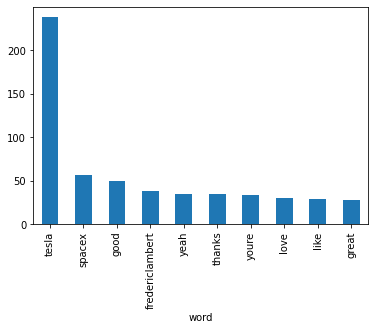

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

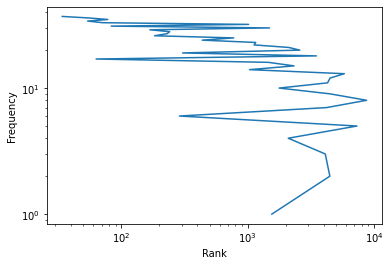

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['grimezsz', 'turns']), WordList(['turns', 'out']), WordList(['out', 'take']), WordList(['take', 'dayquil']), WordList(['dayquil', 'exexcited']), WordList(['exexcited', 'larry']), WordList(['larry', 'ellison']), WordList(['ellison', 'kathleen']), WordList(['kathleen', 'wi']), WordList(['wi', 'nutmegthered']), WordList(['nutmegthered', 'tesla']), WordList(['tesla', 'ok']), WordList(['ok', 'westcoastbill']), WordList(['westcoastbill', 'tesla']), WordList(['tesla', 'team']), WordList(['team', 'did']), WordList(['did', 'great']), WordList(['great', 'job']), WordList(['job', 'teslaownerssv']), WordList(['teslaownerssv', 'alexraikos']), WordList(['alexraikos', '2020']), WordList(['2020', 'alexraikos']), WordList(['alexraikos', 'yesseanabragg']), WordList(['yesseanabragg', 'ecoheliguy']), WordList(['ecoheliguy', '13ericralph31']), WordList(['13ericralph31', 'ncbirbhecoheliguy']), WordList(['ncbirbhecoheliguy', '13ericralph31']), WordList(['13ericralph31', 'ncbirbhan']), WordList(['n

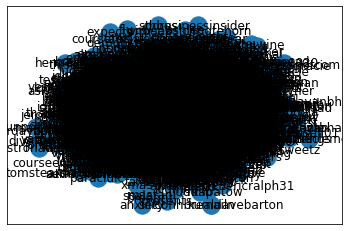

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2019

In [ ]:
df = pd.read_csv('2019.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','there','9','am','3','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

austinbarnard45 tjq1190 tygercyber fawfulfirinaantony tjq1190 tygercyber fawfulfan tjq1190 tygercyber fawfulfan mikemo di geofficient pretty much annerajb justpaulinelol federaljustpaulinelol annerajb probably 2021 dependannerajb hopefully working caribbean endwaitbutwhy kurzgesagt maximizing conversion theassassin95 too secreterdayastronaut teslaownerssv benioff hopefulteslaownerssv benioff boring co completing flcnhvy hes still much faster these would road tunnels zero emissions teslaownerssv done dawn salo4201 would fringe benefit build super safe earthquakeproof tunnels undejaneidyeve flight hopefully 2 months awayjaneidyeve were now building flight design ofwas up night spacex team working stdiscovermag please stop spamming bleak links gutgutm3 jamescharles ok teslarati activating engine two kakarotto1385 flcnhvy sofiaan erdayastronauflcnhvy sofiaan erdayastronaut overarchiflcnhvy sofiaan erdayastronaut kristennetten future featureturn auto navigate feature car acsofiaan erdayastr

In [ ]:
a = text.split()
print(a)

['austinbarnard45', 'tjq1190', 'tygercyber', 'fawfulfirinaantony', 'tjq1190', 'tygercyber', 'fawfulfan', 'tjq1190', 'tygercyber', 'fawfulfan', 'mikemo', 'di', 'geofficient', 'pretty', 'much', 'annerajb', 'justpaulinelol', 'federaljustpaulinelol', 'annerajb', 'probably', '2021', 'dependannerajb', 'hopefully', 'working', 'caribbean', 'endwaitbutwhy', 'kurzgesagt', 'maximizing', 'conversion', 'theassassin95', 'too', 'secreterdayastronaut', 'teslaownerssv', 'benioff', 'hopefulteslaownerssv', 'benioff', 'boring', 'co', 'completing', 'flcnhvy', 'hes', 'still', 'much', 'faster', 'these', 'would', 'road', 'tunnels', 'zero', 'emissions', 'teslaownerssv', 'done', 'dawn', 'salo4201', 'would', 'fringe', 'benefit', 'build', 'super', 'safe', 'earthquakeproof', 'tunnels', 'undejaneidyeve', 'flight', 'hopefully', '2', 'months', 'awayjaneidyeve', 'were', 'now', 'building', 'flight', 'design', 'ofwas', 'up', 'night', 'spacex', 'team', 'working', 'stdiscovermag', 'please', 'stop', 'spamming', 'bleak', 'l

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0               tesla        759
1              spacex        269
2               model        174
3                good        173
4      erdayastronaut        161
...               ...        ...
12985         offjust          1
12986       locations          1
12987            nort          1
12988      insightful          1
12989         iplease          1

[12990 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0           tesla        759
1          spacex        269
2           model        174
3            good        173
4  erdayastronaut        161
5            like        126
6            yeah        124
7         flcnhvy        124
8          thanks        121
9          rocket         96

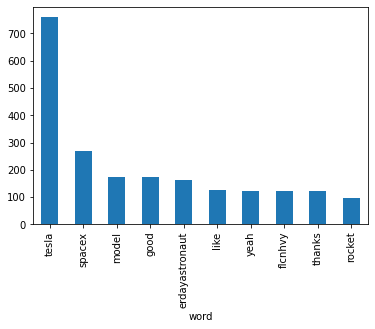

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

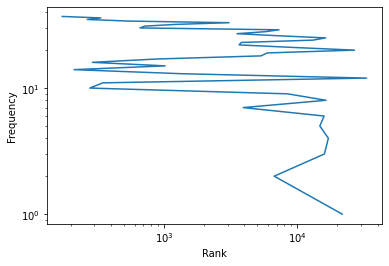

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['austinbarnard45', 'tjq1190']), WordList(['tjq1190', 'tygercyber']), WordList(['tygercyber', 'fawfulfirinaantony']), WordList(['fawfulfirinaantony', 'tjq1190']), WordList(['tjq1190', 'tygercyber']), WordList(['tygercyber', 'fawfulfan']), WordList(['fawfulfan', 'tjq1190']), WordList(['tjq1190', 'tygercyber']), WordList(['tygercyber', 'fawfulfan']), WordList(['fawfulfan', 'mikemo']), WordList(['mikemo', 'di']), WordList(['di', 'geofficient']), WordList(['geofficient', 'pretty']), WordList(['pretty', 'much']), WordList(['much', 'annerajb']), WordList(['annerajb', 'justpaulinelol']), WordList(['justpaulinelol', 'federaljustpaulinelol']), WordList(['federaljustpaulinelol', 'annerajb']), WordList(['annerajb', 'probably']), WordList(['probably', '2021']), WordList(['2021', 'dependannerajb']), WordList(['dependannerajb', 'hopefully']), WordList(['hopefully', 'working']), WordList(['working', 'caribbean']), WordList(['caribbean', 'endwaitbutwhy']), WordList(['endwaitbutwhy', 'kurzges

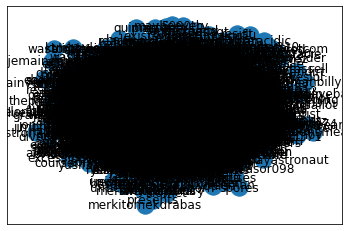

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2020

In [ ]:
df = pd.read_csv('2020.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','9','am','3','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

kimpaquette meeting larry ellison richierichhhhh absolutelywhat should tesla incar gaming ppathole wsj absolutely tesmaniancom taste futuretry playing polytopia tesla great gamewsj focus making products services pethatdesignguy msiphiw moosuraj tesla rough laurenrow5 karpathy engineersfeed very importantteslaownerssv lexfridman ok service might beteslaownerssv lexfridman mean install thegunmtlm3 lexfridman definitely year lexfridman good pointconexionspacial spacecoaststve nasaspacefli flcnhvy liz always done great interviewsspacecoaststve nasaspaceflight falcon 25karpathy vaccines start alsjgrano305 teslatruckclub jeremyjudkins jpucteslatruckclub jeremyjudkins jpuconn jchyboivanescobosa erdayastronaut teslaownerssv erdayastronaut teslaownerssv sure erdayastronaut teslaownerssv haha okkkvr2823 teslaadri teslaownerssv there teslaadri teslaownerssv yesteslaownerssv need match other traffic stevewoz definitelyflcnhvy h3extrachars step dir13arm13arm one 12 dont ha westcoastbill writing cob

In [ ]:
a = text.split()
print(a)

['kimpaquette', 'meeting', 'larry', 'ellison', 'richierichhhhh', 'absolutelywhat', 'should', 'tesla', 'incar', 'gaming', 'ppathole', 'wsj', 'absolutely', 'tesmaniancom', 'taste', 'futuretry', 'playing', 'polytopia', 'tesla', 'great', 'gamewsj', 'focus', 'making', 'products', 'services', 'pethatdesignguy', 'msiphiw', 'moosuraj', 'tesla', 'rough', 'laurenrow5', 'karpathy', 'engineersfeed', 'very', 'importantteslaownerssv', 'lexfridman', 'ok', 'service', 'might', 'beteslaownerssv', 'lexfridman', 'mean', 'install', 'thegunmtlm3', 'lexfridman', 'definitely', 'year', 'lexfridman', 'good', 'pointconexionspacial', 'spacecoaststve', 'nasaspacefli', 'flcnhvy', 'liz', 'always', 'done', 'great', 'interviewsspacecoaststve', 'nasaspaceflight', 'falcon', '25karpathy', 'vaccines', 'start', 'alsjgrano305', 'teslatruckclub', 'jeremyjudkins', 'jpucteslatruckclub', 'jeremyjudkins', 'jpuconn', 'jchyboivanescobosa', 'erdayastronaut', 'teslaownerssv', 'erdayastronaut', 'teslaownerssv', 'sure', 'erdayastronau

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0                    tesla        982
1                   spacex        393
2           erdayastronaut        302
3                  flcnhvy        286
4                     good        226
...                    ...        ...
16461           fentrocity          1
16462            realjohnd          1
16463  mitchellhagadrivers          1
16464              dataset          1
16465              iplease          1

[16466 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0           tesla        982
1          spacex        393
2  erdayastronaut        302
3         flcnhvy        286
4            good        226
5           model        191
6            yeah        172
7           great        161
8        ppathole        157
9          thanks        148

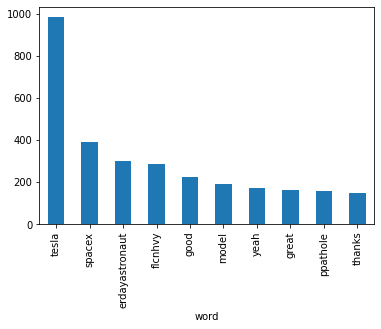

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

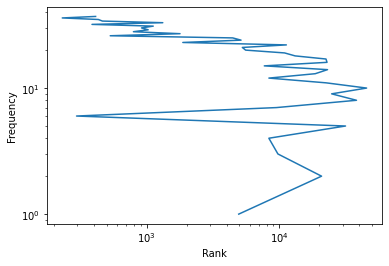

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['kimpaquette', 'meeting']), WordList(['meeting', 'larry']), WordList(['larry', 'ellison']), WordList(['ellison', 'richierichhhhh']), WordList(['richierichhhhh', 'absolutelywhat']), WordList(['absolutelywhat', 'should']), WordList(['should', 'tesla']), WordList(['tesla', 'incar']), WordList(['incar', 'gaming']), WordList(['gaming', 'ppathole']), WordList(['ppathole', 'wsj']), WordList(['wsj', 'absolutely']), WordList(['absolutely', 'tesmaniancom']), WordList(['tesmaniancom', 'taste']), WordList(['taste', 'futuretry']), WordList(['futuretry', 'playing']), WordList(['playing', 'polytopia']), WordList(['polytopia', 'tesla']), WordList(['tesla', 'great']), WordList(['great', 'gamewsj']), WordList(['gamewsj', 'focus']), WordList(['focus', 'making']), WordList(['making', 'products']), WordList(['products', 'services']), WordList(['services', 'pethatdesignguy']), WordList(['pethatdesignguy', 'msiphiw']), WordList(['msiphiw', 'moosuraj']), WordList(['moosuraj', 'tesla']), WordList(['

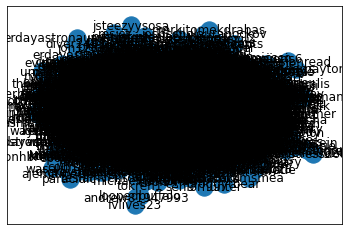

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2021

In [ ]:
df = pd.read_csv('2021.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','9','am','3','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

In [ ]:
a = text.split()
print(a)

['teslaraj', 'many', 'ui', 'improvements', 'comingcsmithson80', 'heydave7', 'blkmdl3', 'mims', 'charblkmdl3', 'mims', 'predicting', 'macroeconomics', 'chamims', 'history', 'any', 'guide', 'many', 'ma', 'waitbutwhy', 'tball5', 'probably', 'wrong', 'heydave7', 'ppathole', 'dogailalfaratx', 'sawyermerritt', 'wow', 'working', 'thsawyermerritt', 'ashok', 'first', 'person', 'recru', 'esprittesla', 'chazman', 'lexfridman', 'risermaker', 'engineersfeed', '700nm', '400nmsirineati', 'engineersfeed', 'faa', 'approval', 'lex', 'asks', 'great', 'questionscleantechnica', 'most', 'people', 'still', 'idea', 'spacexmr', 'engineersfeed', 'resolution', 'universe', 'karpathy', 'reality', 'simulated', 'lexfridman', 'yeah', 'smarter', 'someone', 'hbillym2k', 'now', 'webb', 'telescope', 'been', 'billym2k', 'simulations', 'way', 'down', 'uppathole', 'people', 'able', 'break', 'any', 'laws', 'mad', 'physics', 'formulas', 'rendering', 'rulesso', 'much', 'ai', 'compressing', 'reality', 'astatsfeed', 'engineersfe

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0                      tesla        202
1                     spacex        173
2              wholemarsblog        115
3              teslaownerssv         75
4             erdayastronaut         69
...                      ...        ...
4826          2022trungtphan          1
4827            yearsflcnhvy          1
4828  limitingtwholemarsblog          1
4829                    46mm          1
4830                    self          1

[4831 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0            tesla        202
1           spacex        173
2    wholemarsblog        115
3    teslaownerssv         75
4   erdayastronaut         69
5         ppathole         68
6         billym2k         55
7  nasaspaceflight         53
8            great         46
9             haha         44

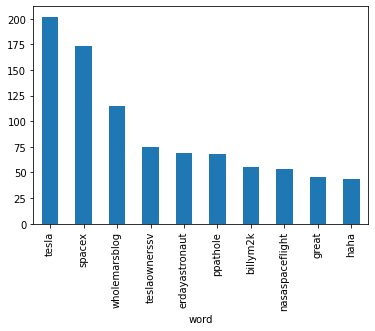

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

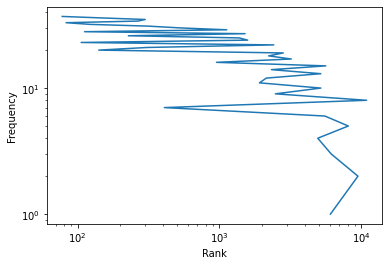

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['teslaraj', 'many']), WordList(['many', 'ui']), WordList(['ui', 'improvements']), WordList(['improvements', 'comingcsmithson80']), WordList(['comingcsmithson80', 'heydave7']), WordList(['heydave7', 'blkmdl3']), WordList(['blkmdl3', 'mims']), WordList(['mims', 'charblkmdl3']), WordList(['charblkmdl3', 'mims']), WordList(['mims', 'predicting']), WordList(['predicting', 'macroeconomics']), WordList(['macroeconomics', 'chamims']), WordList(['chamims', 'history']), WordList(['history', 'any']), WordList(['any', 'guide']), WordList(['guide', 'many']), WordList(['many', 'ma']), WordList(['ma', 'waitbutwhy']), WordList(['waitbutwhy', 'tball5']), WordList(['tball5', 'probably']), WordList(['probably', 'wrong']), WordList(['wrong', 'heydave7']), WordList(['heydave7', 'ppathole']), WordList(['ppathole', 'dogailalfaratx']), WordList(['dogailalfaratx', 'sawyermerritt']), WordList(['sawyermerritt', 'wow']), WordList(['wow', 'working']), WordList(['working', 'thsawyermerritt']), WordList([

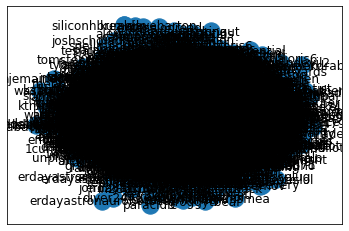

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)

##For 2022

In [ ]:
df = pd.read_csv('2022.csv',header = 1)
df2 = df.iloc[:,7]
df2 = df2.str.lower()
result = df2.to_string(index = False)
res = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", result)
stop = ['to','the','is','do','just','9','am','3','all','than','of','an','for','in','it','is','was','its','at','that','on','are','we','this','and','have','has','had','be','if','will','or','by','about','so','it’s','with','my','they','you','him','her','his','he','she','your','you', 'what', 'why', 'where', 'who', 'our', 'ours','them','their','but','me','mine','from','as','yes','no','not','can','lot'
,"we've","what's","doesn't",'https','amp','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
text = " ".join([word for word in res.split() if word not in (stop)])

print(text)

teslaownerssv beautiful home lifespacepadreisle some starlink terminals near co rationaletienne rogeryar exactlyrogeryar news sources partially propagstarlink been told some governments notspacex reprioritized cyber defense ove michaeltchiass1 cole00708909 ashleevance gailalfaratx exactlyand also sympathies great people hold strong ukraine obviously would negatively affect tesla hate say need increase oil amrenatakonkoly mlukbrandenburg gigafactory4 mlukbrandenburg gigafactory4 gf4tesla grue waitbutwhy future blkmdl3 teslaownerssv tobyliiiiiiiiii game ontobyliiiiiiiiii almost viasat ukraine usershortword eddyiskongz provided metal eddyiskongz place light camouflage over antenneddyiskongz turn starlink only when needed important warning starlink only nonrusteslarati residentsponge class action lawsfedorovmykhailo spacex spacexstarlink hondaspacex american broomstick whatsupfranks teslarati residentsponge yeahteslarati residentsponge old youtube cliowensparks icannotenough genesimmons jo

In [ ]:
a = text.split()
print(a)

['teslaownerssv', 'beautiful', 'home', 'lifespacepadreisle', 'some', 'starlink', 'terminals', 'near', 'co', 'rationaletienne', 'rogeryar', 'exactlyrogeryar', 'news', 'sources', 'partially', 'propagstarlink', 'been', 'told', 'some', 'governments', 'notspacex', 'reprioritized', 'cyber', 'defense', 'ove', 'michaeltchiass1', 'cole00708909', 'ashleevance', 'gailalfaratx', 'exactlyand', 'also', 'sympathies', 'great', 'people', 'hold', 'strong', 'ukraine', 'obviously', 'would', 'negatively', 'affect', 'tesla', 'hate', 'say', 'need', 'increase', 'oil', 'amrenatakonkoly', 'mlukbrandenburg', 'gigafactory4', 'mlukbrandenburg', 'gigafactory4', 'gf4tesla', 'grue', 'waitbutwhy', 'future', 'blkmdl3', 'teslaownerssv', 'tobyliiiiiiiiii', 'game', 'ontobyliiiiiiiiii', 'almost', 'viasat', 'ukraine', 'usershortword', 'eddyiskongz', 'provided', 'metal', 'eddyiskongz', 'place', 'light', 'camouflage', 'over', 'antenneddyiskongz', 'turn', 'starlink', 'only', 'when', 'needed', 'important', 'warning', 'starlink'

In [ ]:
b = pd.value_counts(np.array(a))
df3 = pd.DataFrame(b)
df4 = df3.reset_index()
df4.columns = ['word', 'frequency']
df4

word  frequency
0             tesla         70
1     wholemarsblog         64
2            spacex         40
3     teslaownerssv         28
4     sawyermerritt         24
...             ...        ...
1118   teslapodcast          2
1119            wow          2
1120       podcasts          2
1121            tim          2
1122             qa          1

[1123 rows x 2 columns]

In [ ]:
df4.head(10)

word  frequency
0          tesla         70
1  wholemarsblog         64
2         spacex         40
3  teslaownerssv         28
4  sawyermerritt         24
5       billym2k         24
6           good         18
7       starlink         18
8     waitbutwhy         18
9          great         18

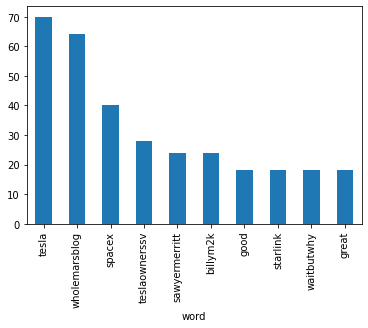

In [ ]:
df4.head(10).plot(x="word", y="frequency", kind="bar",legend = False)

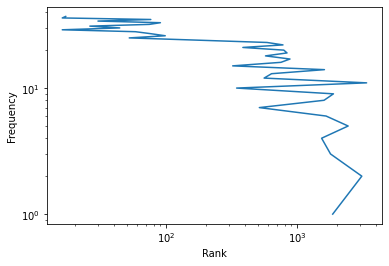

In [ ]:
fd=FreqDist()
ran = []
freq = []
for j in text:
    fd[j] +=1
for rank,word in enumerate(fd):
    ran.append(rank+1)
    freq.append(fd[word])
plt.loglog(freq,ran)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

[WordList(['teslaownerssv', 'beautiful']), WordList(['beautiful', 'home']), WordList(['home', 'lifespacepadreisle']), WordList(['lifespacepadreisle', 'some']), WordList(['some', 'starlink']), WordList(['starlink', 'terminals']), WordList(['terminals', 'near']), WordList(['near', 'co']), WordList(['co', 'rationaletienne']), WordList(['rationaletienne', 'rogeryar']), WordList(['rogeryar', 'exactlyrogeryar']), WordList(['exactlyrogeryar', 'news']), WordList(['news', 'sources']), WordList(['sources', 'partially']), WordList(['partially', 'propagstarlink']), WordList(['propagstarlink', 'been']), WordList(['been', 'told']), WordList(['told', 'some']), WordList(['some', 'governments']), WordList(['governments', 'notspacex']), WordList(['notspacex', 'reprioritized']), WordList(['reprioritized', 'cyber']), WordList(['cyber', 'defense']), WordList(['defense', 'ove']), WordList(['ove', 'michaeltchiass1']), WordList(['michaeltchiass1', 'cole00708909']), WordList(['cole00708909', 'ashleevance']), W

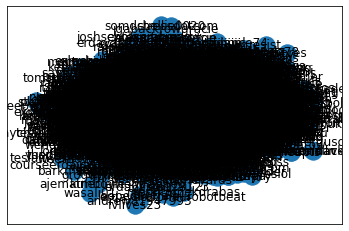

In [ ]:
ngram_object = TextBlob(text)
ngrams = ngram_object.ngrams(n=2)
G.add_edges_from(ngrams)
print(ngrams)
nx.draw_networkx(G)